<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [48]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [5]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



CRIM


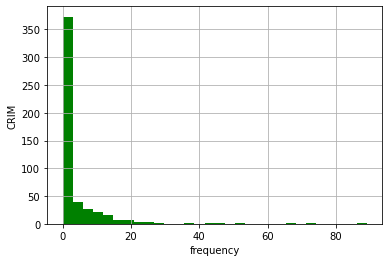

ZN


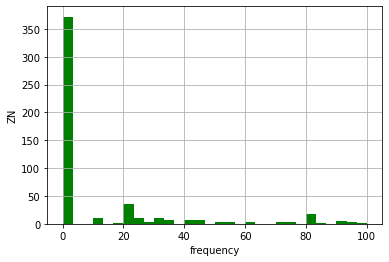

INDUS


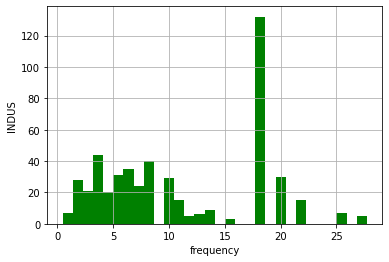

CHAS


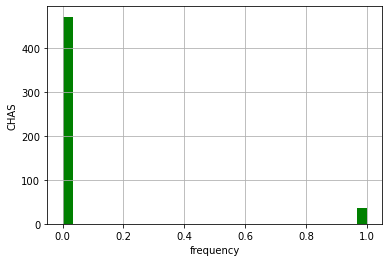

NOX


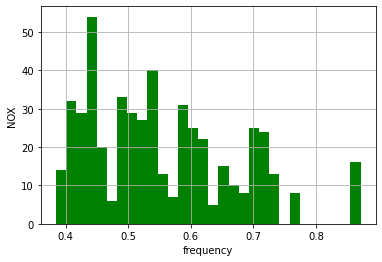

RM


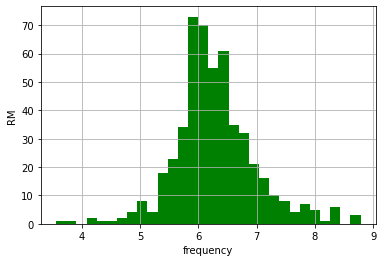

AGE


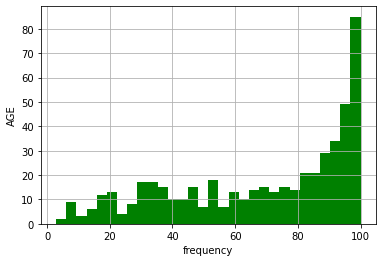

DIS


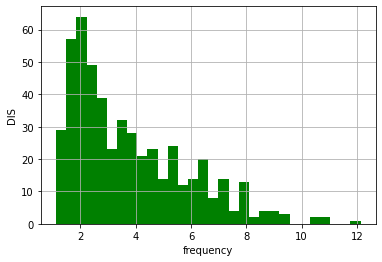

RAD


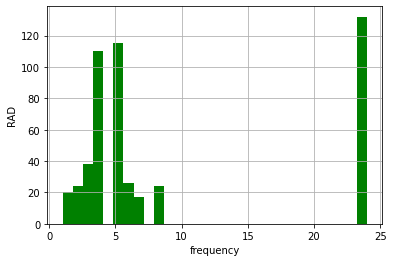

TAX


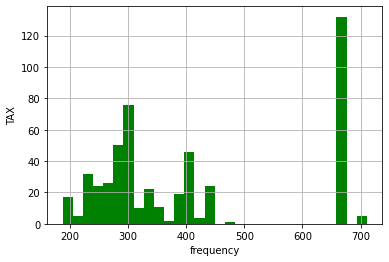

PTRATIO


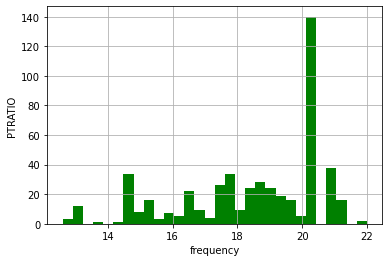

B


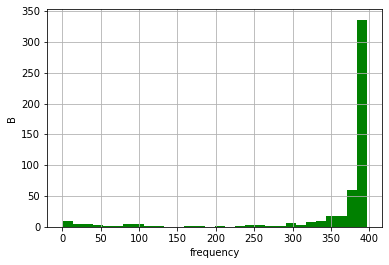

LSTAT


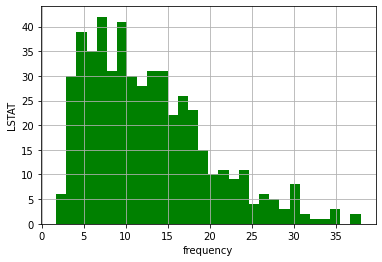

MEDV


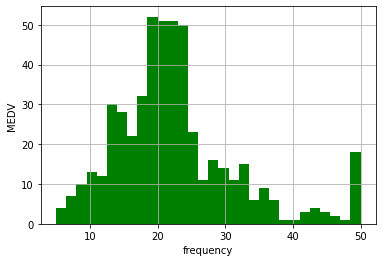

In [12]:
for i in data:
    print (f'{i}')
    n, bins, patches = plt.hist(data[i], 30, facecolor='g')
    plt.xlabel('frequency')
    plt.ylabel(i)
    plt.grid(True)
    plt.show()

CRIM - экспоненциальное распределение
ZN - биномиальное распределение
INDUS - биномиальное распределение
CHAS - распределение Бернулли
NOX - логнормальное распределение
RM - нормальное распределение
AGE - логнормальное распределение
DIS - биномиальное распределение
RAD - биномиальное распределение
TAX - биномиальное распределение
PTRATIO - биномиальное распределение
B - геометрическое распределение
LSTAT - логнормальное распределение
MEDV - нормальное распределении

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

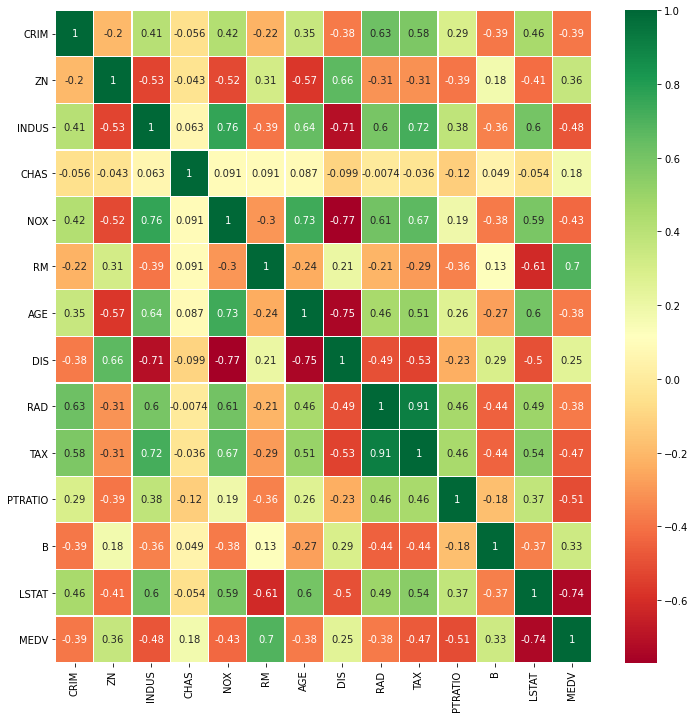

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

RM максимально коррелирует с MEDV.

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [18]:
MEDV = np.array(data.MEDV).reshape(-1,1)
LSTAT = np.array(data.LSTAT).reshape(-1,1)
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(
    MEDV,
    LSTAT,
    test_size = 0.2
)
model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

Смотрим предсказания модели и считаем ошибку, строим график линейной регрессии: 

20.07012223226798
3.5272545236268638


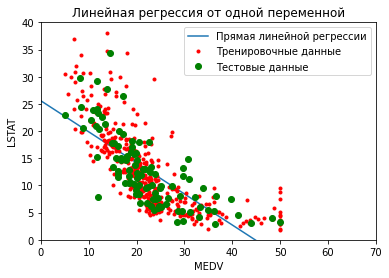

In [23]:
predicted_y = model.predict(X_test)
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,70)
plt.ylim(0,40)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

получается, цены на дом и процент более низкого статуса населения коррелируют между собой

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [13]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
whr=pd.read_csv(url)
whr.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [38]:
whr.cov()


,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? [23] 
Если есть отсутствующие значения в выборке country, убрать (drop).

Сколько стран в выборке? [156]

In [41]:
print(whr.isnull().sum())
len(whr['Country (region)'])

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64


156

In [43]:
whr.dropna(inplace=True)

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

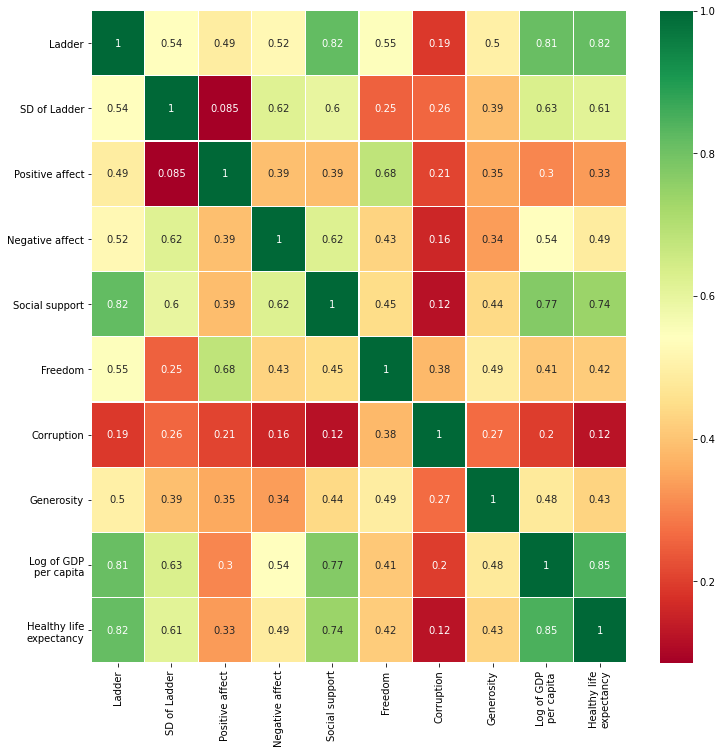

In [14]:
sns.heatmap(whr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
Здоровый образ жизни имеет сильную зависимость с процентом ВВП. 
Индекс счастья сильно коррелирует с образом жизни, и сильно коррелирует с размером ВВП и соц. поддержкой.
Позитивные настроения очень слабо связаны почти со всеми показателями, кроме уровня свободы. 
На негативные настроения влияет соц. поддержка и показатель стандартного отклонения индекса счастья.
Социальная поддержка влияет на индекс счастья, показатель стандартоного отклонения индекса счастья и показатель здорового образа жизни.
Коррупция практически не коррелирует ни с одним из показателей, как и щедрость. 




# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

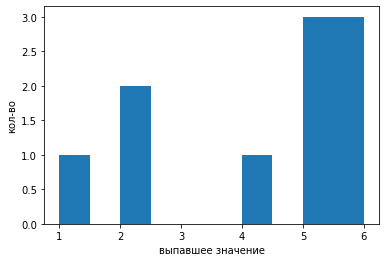

In [61]:
plt.hist(np.random.randint(1,7,10), 10)
plt.xlabel('выпавшее значение')
plt.ylabel('кол-во')
plt.show()

In [ ]:
Десяти подбрасываний слишком мало, чтобы определить вид распределения, сейчас оно выглядит как неравномерное. 

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему? 

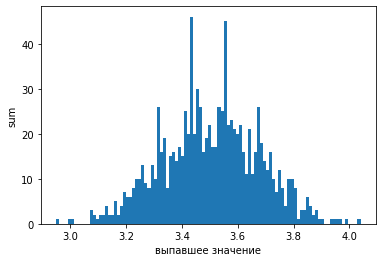

In [75]:
number_of_sums = 1000
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    X1[i] = np.sum(np.random.randint(1,7,100))/100
plt.hist(X1, 100)
plt.xlabel('выпавшее значение')
plt.ylabel('sum')
plt.show()



Закон больших чисел -- суммы элементов элементов выборок стремится к нормальному распределению.